# Loading data and data cleanning:
1. The code is written in google colab. The dataset and code are all saved in the directory of drive/MyDrive/CSE578/
2. Read data, set into dataframe, clean out duplicates, drop the column "Fnlwgt". 
3.  Replace the "?" with nan. And check the attributes categories. Have an overview of data.


In [ ]:
cd drive/MyDrive/CSE578

/content/drive/MyDrive/CSE578


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates

In [ ]:
MYCOLUMN = ["Age", "WorkClass", "Fnlwgt", "Education", "Education_Num", "Marital_Status", "Occupation", "Relationship",
            "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_Per_Week", "Native_Country", "Income"]
CATE_COL = ["WorkClass", "Education", "Marital_Status", "Occupation", "Relationship", "Race", "Sex", "Native_Country"]
NUM_COL = ["Age", "Education_Num", "Hours_Per_Week", "Capital_Gain", "Capital_Loss"]

In [ ]:
def clean(df):
  """ clean out duplicates, replace'?' with np.nan, and drop column 'Fnlwgt', return cleaned dataframe"""
  df.drop_duplicates(inplace=True) 
  df.drop(columns="Fnlwgt", axis=1, inplace=True)
  df.replace(' ?', np.nan, inplace=True)

  return df

In [ ]:
data = pd.read_csv("adult.data")
data.columns = MYCOLUMN
clean(data)

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA Functions


## Univariate analysis functions:


### 1. Plots with normalized data 
- data normalizition
- bar_chart_n
- line_chart_n



In [ ]:


def data_preparation_normalize(column):
  
  # calculate the population and percentage to income level in each state in the group
  # hold the data into a new dataframe
  below = data.loc[data["Income"] == " <=50K"]
  above = data.loc[data["Income"] == " >50K"]
  
  if column == "Education":
    df_total = data.groupby(["Education_Num", "Education"])["Income"].count().rename("Total")
    df_below = below.groupby(["Education_Num", "Education"])["Income"].count().rename("Below")
  else:
    df_total = data.groupby([column])["Income"].count().rename("Total")
    df_below = below.groupby([column])["Income"].count().rename("Below")
  df_above = (df_total - df_below).rename("Above")
  df = pd.concat([df_total, df_above, df_below], axis=1)

  df[">50K"] =round(100 * df["Above"] / df["Total"], 2)
  df["<=50K"] =round(100 * df["Below"] / df["Total"], 2)
 
  return df
  


In [ ]:
def bar_chart_n(column):
# make a bar plot to show the percentage of weight of each state
# for education use the "Education" as xlabel instead of "Education_Num"
  df = data_preparation_normalize(column)


  if column == "Education":
    xt = [level for (num, level) in df.index]
    df.index = xt
  title = f"Distribution of {column} with Different Income"
  df.plot(y=["<=50K", ">50K"], kind="bar")
  plt.title(title, pad=20)  
  plt.ylabel(f"Percentage of Weight by {column}")
  if column in CATE_COL:
    plt.xticks(rotation=90)
  plt.show()  


In [ ]:
def line_chart_n(column):
  df = data_preparation_normalize(column)
  title = f"Distribution of {column} with Different Income"
  df.plot(y=["<=50K", ">50K"], kind="line", linewidth=4)
  plt.title(title, pad=20)  
  plt.ylabel(f"Percentage of Weight by {column}")
  if column in CATE_COL:
    plt.xticks(rotation=90)
  plt.show()  

### 2. Plots with oringinal data:
- box_plot_u
- hist_kde


In [ ]:
def box_plot_u(column):
  
# for numerical data draw a box plot to show the mean number of the class to income
  title = f"Distribution of {column} with Different Income"
  sns.boxplot(data=data, x=column, y="Income")

  plt.title(title, pad=20)
  plt.show()


In [ ]:
def hist_kde(column):
  title = f"{column} distribution on Income"
  sns.histplot(data = data, x = column, hue='Income', bins=72, kde=True)
  plt.title(title, pad=20)
  plt.show()

### 3. Data preview:
Univariate analysis with bar_chart_n, line chart_n , hist_kde & box_plot_u

In [ ]:
def uni_analysis():
  for col in data.columns:
    if col == "Income":
      continue
    if col == "Education_Num":
      hist_kde(col)
      box_plot_u(col)
    elif col == "Education":
      bar_chart_n(col)
      line_chart_n(col)
    elif col not in CATE_COL:
      hist_kde(col)
      bar_chart_n(col)
      box_plot_u(col)
    else:
      bar_chart_n(col)



### 4. Plots with grouped data:
- Group data
- Pie chart

In [ ]:
def group_data():
  # "WorkClass", "Education", "Marital_Status", "Occupation", "Relationship", "Race", "Sex", "Native_Country"
  df = data.copy()
  df = df.sort_values('Education_Num').reset_index()

  # for "Race":
  df['Race'] = df['Race'].replace(' Amer-Indian-Eskimo', ' Other')

  # for "WorkClass"
  ori = [' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',' Local-gov', np.nan, ' Self-emp-inc', ' Without-pay', ' Never-worked']
  new = [' Self-emp', ' Private', ' gov', ' gov', ' gov', np.nan, ' Self-emp', np.nan, np.nan]
  df['WorkClass'] = df['WorkClass'].replace(ori, new)

  # for "Marital_Status"
  ori = [' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed']
  new = [' Married', ' Separated', ' Widow', ' Never-married', ' Separated', ' Married', ' Widow']
  df['Marital_Status'] = df['Marital_Status'].replace(ori, new)

  # for "Relationship"
  df['Relationship'] = df['Relationship'].replace(' Unmarried', ' Other-relative')

  # "Capital_Gain", "Capital_Loss"
  df["Capital"] = df['Capital_Gain'] - df['Capital_Loss']
  mask = [df['Capital'] > 0, df['Capital'] == 0, df['Capital'] < 0]
  labels = ['Gain Capital', 'No Capital', 'Loss Capital']
  df['Capital'] = np.select(mask, labels, 0)

  # for "Education_Num"
  mask = [df['Education_Num'] <= 8, df['Education_Num'] == 9, df['Education_Num'].between(10, 12), df['Education_Num'] == 13, df['Education_Num'] > 13 ]
  label = ["Before HS", "HS grad", "Associate", "Bachelor", "MS/Doc"]
  df['Education_Level'] = np.select(mask, label, 0)

  # for "Hours_Per_Week"
  mask = [df['Hours_Per_Week'] <= 40, df['Hours_Per_Week'] > 40]
  labels = ['<=40 hours', '>40 hours']
  df['Hours_Per_Week'] = np.select(mask, labels, 0)

  # for "Age"
  mask = [df['Age'] < 31, df['Age'].between(31, 44), df['Age'].between(45, 59), df['Age'] > 59]
  labels = ['17-30 years old', '30-45 years old', '45-60 years old', '60-87 years old' ]  
  df['Age'] = np.select(mask, labels, 0)
  return df


In [ ]:
def pie_chart(column):
  df_group = group_data()

  above = df_group.loc[df_group['Income'] == " >50K"][column].value_counts().rename(">50K")
  below = df_group.loc[df_group['Income'] == " <=50K"][column].value_counts().rename("<=50K")
  df_pie = pd.concat([above, below], axis=1)

  fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
  df_pie.plot(kind="pie", y=">50K", startangle=0, autopct='%1.1f%%', ax=ax[0],legend=False, title=f"Distributon of {column} on Income")
  df_pie.plot(kind="pie", y= "<=50K", startangle=0, autopct='%1.1f%%',legend=False,ax=ax[1])


 
  plt.show()

## Multivariate analysis functions:



### 1. box plot


In [ ]:
def box_plot(dataset, column1, column2):
  # plot based on a given dataset, beside of "Income", include another two attributes
  fig,ax=plt.subplots(figsize=(6, 4))
  sns.boxplot(data=dataset, x=column1, y=column2, hue="Income")
  plt.legend(loc="upper right")
  plt.title(f"{column1} {column2} vs Income", pad=20)

### 2. parallel coordinate plot


In [ ]:
def parallel_coordinate_plot(columns):
  # import a columns list, get the parallel coordinate plot
  plot_list = ["Income"]
  plot_list += columns
  title = f"{columns[0]}, {columns[1]},{columns[2]} vs Income"
  fig, ax = plt.subplots(figsize=(8,6))
  parallel_coordinates(data[plot_list], "Income", colormap="rainbow")
  plt.yscale("log")
  plt.title(title)
  plt.show()

### 3. scatter matrix

<ipython-input-22-8ab6d2b12cc1>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(below, ax=ax)


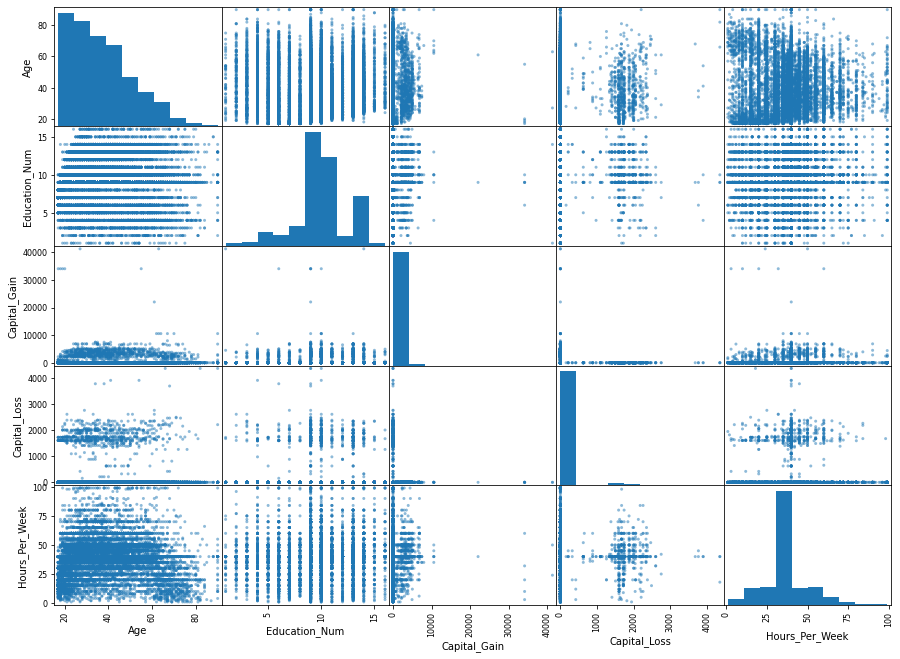

<ipython-input-22-8ab6d2b12cc1>:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(above, ax=ax)


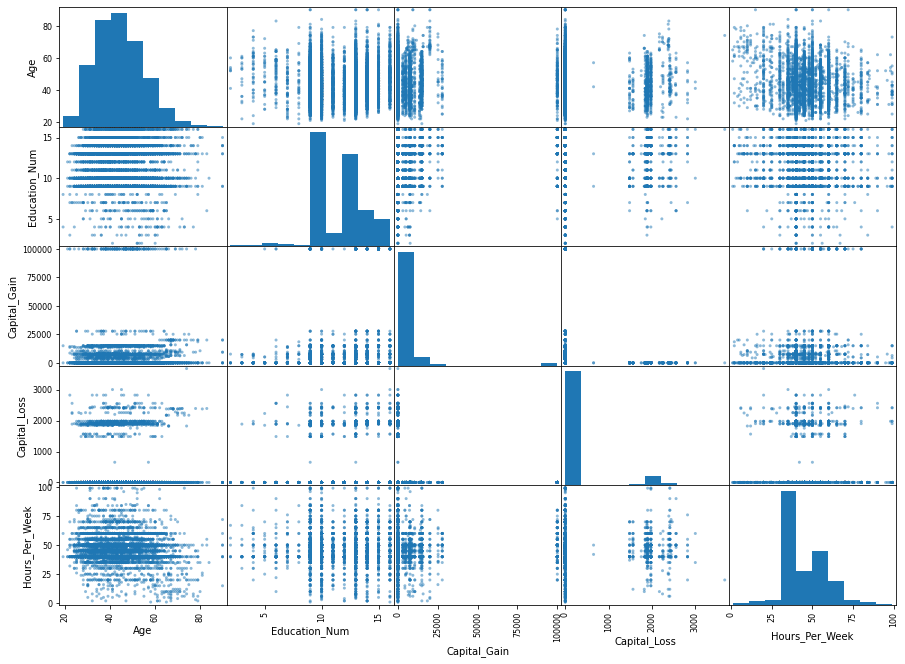

                     Age  Education_Num  Capital_Gain  Capital_Loss  \
Age             1.000000       0.036224      0.077676      0.057745   
Education_Num   0.036224       1.000000      0.122661      0.079901   
Capital_Gain    0.077676       0.122661      1.000000     -0.031638   
Capital_Loss    0.057745       0.079901     -0.031638      1.000000   
Hours_Per_Week  0.068515       0.148426      0.078408      0.054229   

                Hours_Per_Week  
Age                   0.068515  
Education_Num         0.148426  
Capital_Gain          0.078408  
Capital_Loss          0.054229  
Hours_Per_Week        1.000000  


In [ ]:
def scatter_matrix1(dataset):
  # divide the dataset into two parts according to "Income", make scatter matrix respectively
  below = dataset.loc[dataset["Income"] == " <=50K"]
  above = dataset.loc[dataset["Income"] == " >50K"]

  fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,11))
  pd.plotting.scatter_matrix(below, ax=ax)
  ax.set_title("Correlation Between Numerical Attributes On Income Less Than 50K Per Year")
  plt.show()

  fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,11))
  pd.plotting.scatter_matrix(above, ax=ax)
  ax.set_title("Correlation Between Numerical Attributes On Income More Than 50K Per Year")
  plt.show()
  print(dataset.corr())

scatter_matrix1(data)

In [ ]:
def scatter_matrix2(dataset, sub_title):
  title= f"{sub_title} vs Income"
  sns.pairplot(dataset, hue="Income")
  plt.suptitle(title, y=1.02)
  plt.show()


In [ ]:
def scatter_matrix3(dataset):
  g = sns.PairGrid(dataset, hue="Income")
  g.map_diag(sns.histplot)
  g.map_upper(sns.scatterplot)
  g.map_lower(sns.kdeplot)
  g.add_legend()

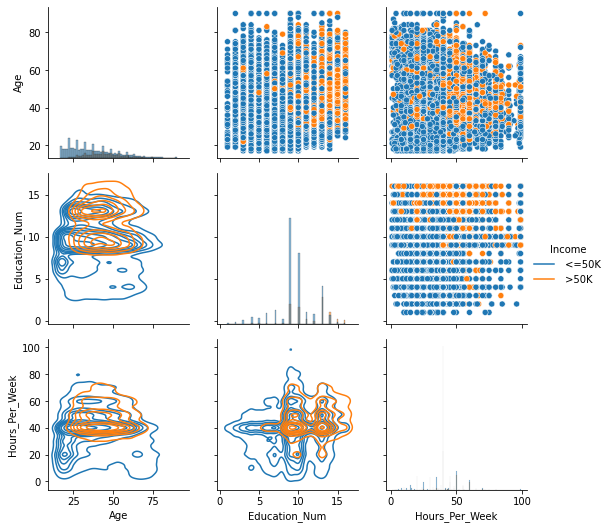

In [ ]:
data_sm = data[["Age", "Education_Num", "Hours_Per_Week", "Income"]]
scatter_matrix3(data_sm)

In [ ]:
def scatter_plot_biviriate(column1, column2):
  below = data.loc[data["Income"] == " <=50K"]
  above = data.loc[data["Income"] == " >50K"]
  title = f"Correlation between {column1} and {column2} with Different Income"
  fig, ax = plt.subplots(nrows=1, ncols=1)
  below.plot.scatter(x=column1, y=column2, label="<=50K", ax=ax)
  above.plot.scatter(x=column1, y=column2, label=">50K", c= "orange", ax=ax)
  ax.set_title(title)
  plt.show()


In [ ]:
def check_scatter_plot_biviriate():
  check_list = []
  for i in range(len(NUM_COL)-1):
    for j in range(len(NUM_COL)):
      if i == j or (NUM_COL[i], NUM_COL[j]) in check_list:
        continue
      scatter_plot_biviriate(NUM_COL[i], NUM_COL[j])
      
      check_list.append((NUM_COL[i], NUM_COL[j]))
      check_list.append((NUM_COL[j], NUM_COL[i]))


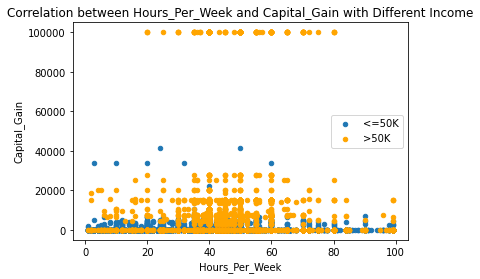

In [ ]:
scatter_plot_biviriate('Hours_Per_Week', 'Capital_Gain')

### 4. mosiac plot

In [ ]:
def mosaic_plot(columns):
  # pass in a list of columns, mind the sequense
  data_m = group_data()
  fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 8))
  fig.subplots_adjust(hspace=.5)
  mosaic(data_m, columns, ax=ax)
  plt.title(f"{columns[0]}, {columns[1]} vs Income")
  plt.show()











































# User story 1: "Education"

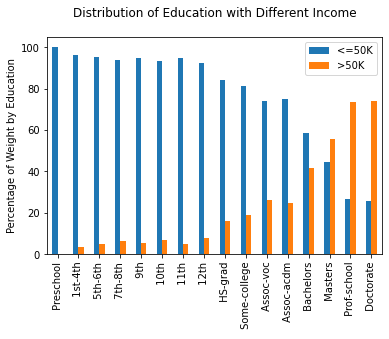

In [ ]:
bar_chart_n('Education')


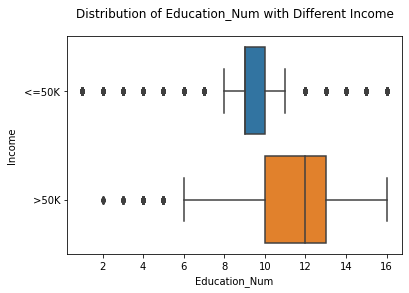

In [ ]:
box_plot_u('Education_Num')





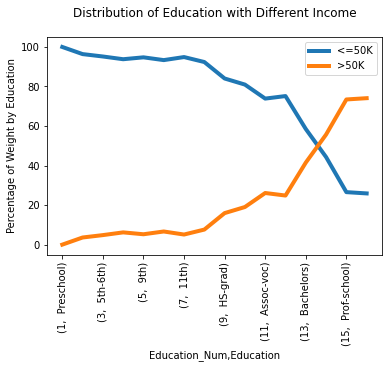

In [ ]:
line_chart_n('Education')

# User story 2:"Age", "Hours_Per_Week", "Education"

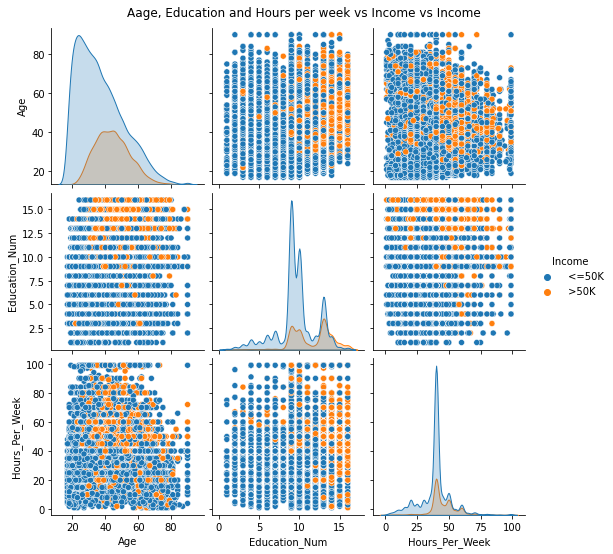

In [ ]:
scatter_matrix2(data[["Age", "Education_Num", "Hours_Per_Week", "Income"]], "Aage, Education and Hours per week vs Income")

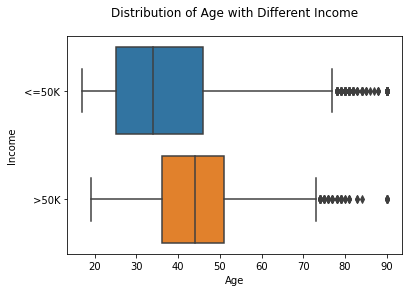

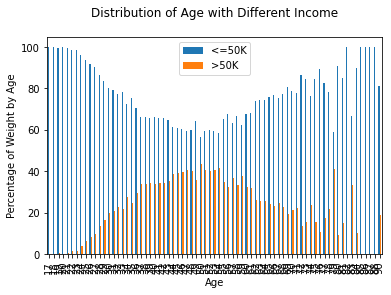

In [ ]:






box_plot_u('Age')
bar_chart_n('Age')


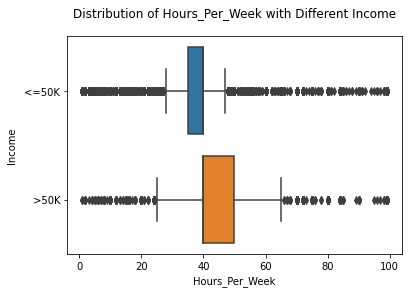

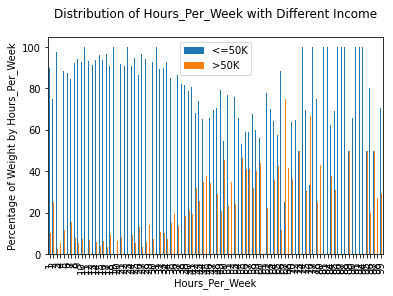

In [ ]:
box_plot_u('Hours_Per_Week')
bar_chart_n('Hours_Per_Week')





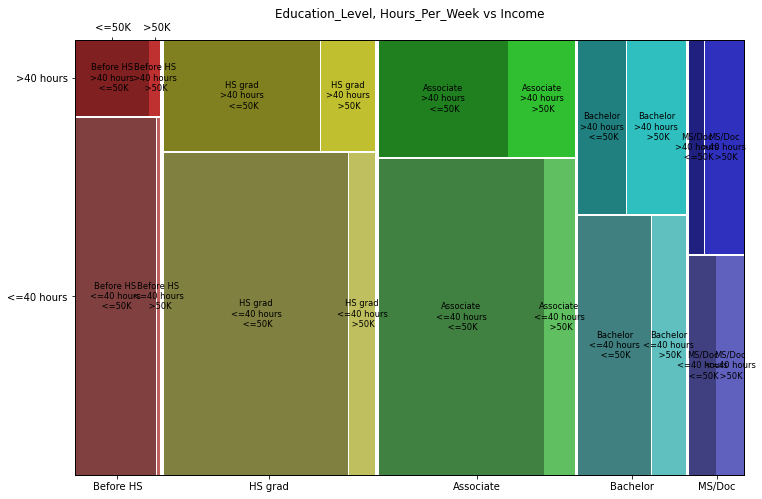

In [ ]:
mosaic_plot(['Education_Level', 'Hours_Per_Week', 'Income'])

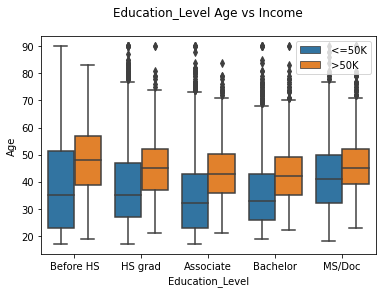

In [ ]:



data_e = data.copy()
data_e = data_e.sort_values('Education_Num').reset_index()
mask = [data_e['Education_Num'] <= 8, data_e['Education_Num'] == 9, data_e['Education_Num'].between(10, 12), data_e['Education_Num'] == 13, data_e['Education_Num'] > 13]
label = ["Before HS", "HS grad", "Associate", "Bachelor", "MS/Doc"]
data_e['Education_Level'] = np.select(mask, label, 0)
box_plot(data_e, "Education_Level", 'Age')


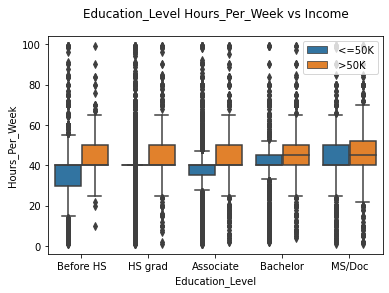

In [ ]:
box_plot(data_e, 'Education_Level', 'Hours_Per_Week')

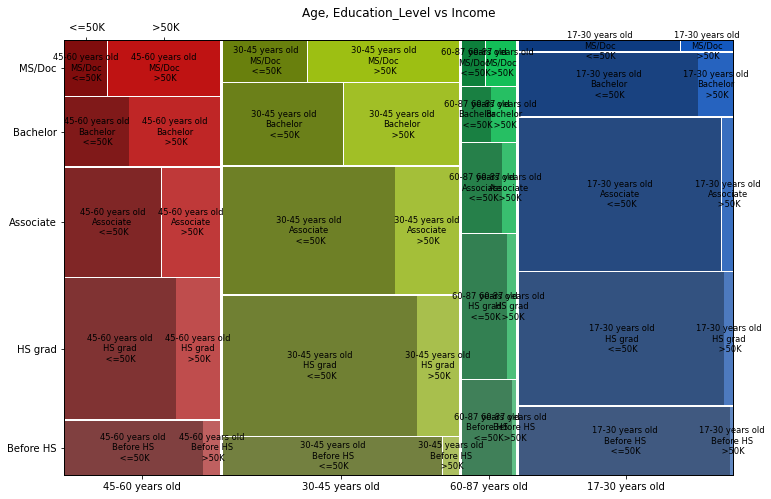

In [ ]:
mosaic_plot(['Age', 'Education_Level', 'Income'])

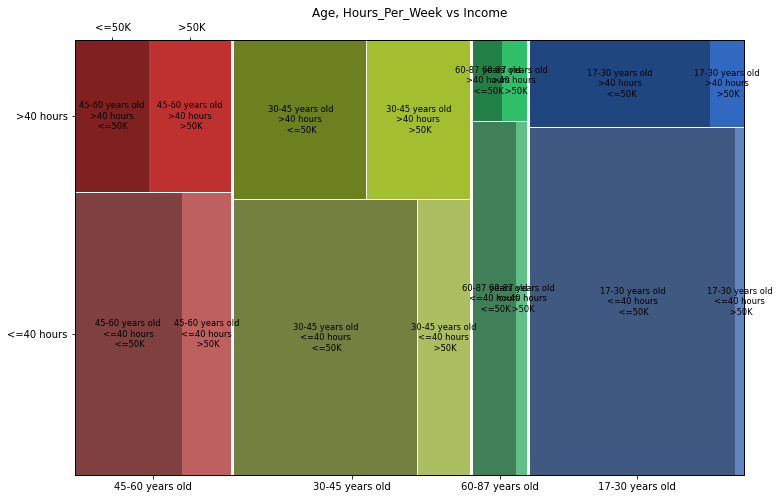

In [ ]:









mosaic_plot(['Age', 'Hours_Per_Week', 'Income'])







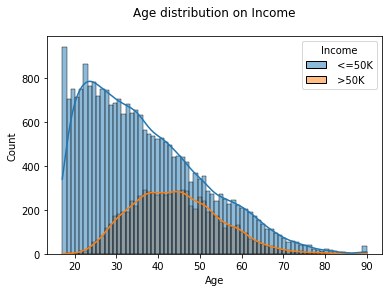

In [ ]:
hist_kde("Age")

# User story 3: Capital_Gain, Capital_Loss, Education


## 1. To check how many groups of 'Capital_Gain' and 'Capital_Loss' in the data.
Group the data with 'Gain Capital','Loss Capital'and 'Have no Cap'

In [ ]:
data.loc[(data['Capital_Gain'] != 0) & (data['Capital_Loss'] != 0)]






,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income


## 2. Plot of 'Capital' & 'Age'

Text(0.5, 1.0, 'Capital vs Income')

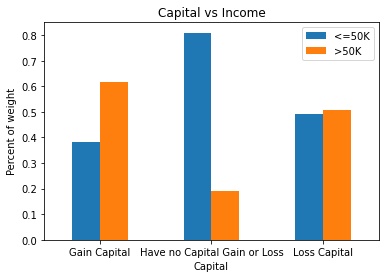

In [ ]:








# group capital_gain and capital_loss together into 'Capital', have to change index
data["Capital"] = data['Capital_Gain'] - data['Capital_Loss']
mask = [data["Capital"] > 0, data["Capital"] == 0, data["Capital"] < 0]
labels = ["Gain Capital", "Have no Capital Gain or Loss", "Loss Capital"]
data["Capital"] = np.select(mask, labels, 0)
dcap = pd.DataFrame(data.groupby("Capital")["Income"].value_counts(normalize=True).rename("Percents").reset_index())
above = dcap.loc[dcap["Income"] == " >50K"][["Capital","Percents"]]
above= above.reset_index()
above.columns = ["n","Capital", ">50K"]
above = above.drop("n", axis=1)
above["<=50K"] = np.array(dcap.loc[dcap["Income"] == " <=50K"]["Percents"])

above.plot(x="Capital", y=["<=50K", ">50K"], kind="bar")
plt.xticks(rotation=0)
plt.ylabel("Percent of weight")
plt.title("Capital vs Income")



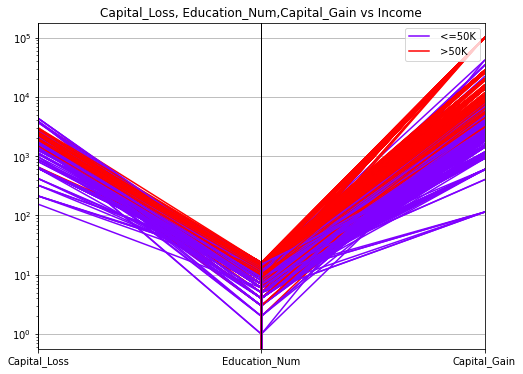

In [ ]:
parallel_coordinate_plot(['Capital_Loss','Education_Num', 'Capital_Gain'])


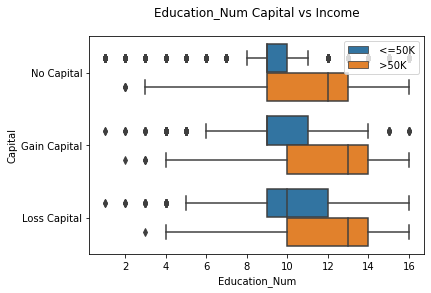

In [ ]:
data_cap = data.copy()
data_cap["Capital"] = data_cap['Capital_Gain'] - data_cap['Capital_Loss']
mask = [data_cap['Capital'] > 0, data_cap['Capital'] == 0, data_cap['Capital'] < 0]
labels = ['Gain Capital', 'No Capital', 'Loss Capital']
data_cap['Capital'] = np.select(mask, labels, 0)
box_plot(data_cap, "Education_Num", "Capital")

# User story 4:"Marital Status", "Relationship"



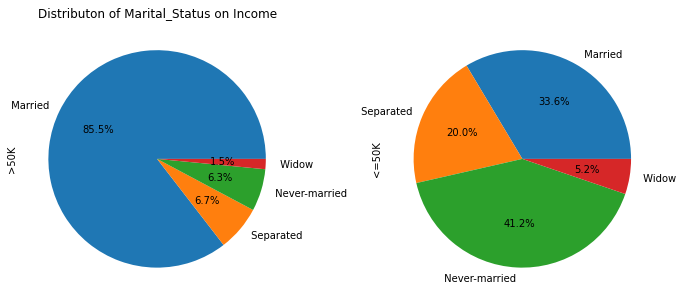

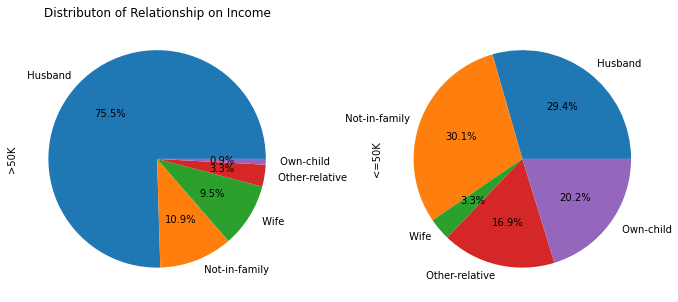

In [ ]:
pie_chart('Marital_Status')
pie_chart('Relationship')

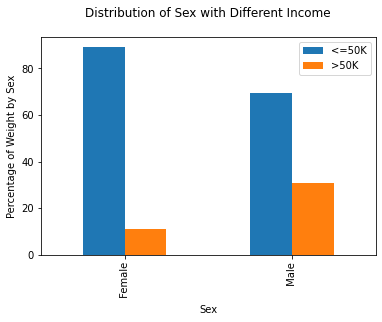

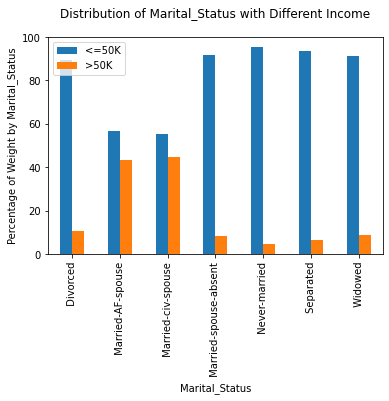

In [ ]:
















bar_chart_n('Sex')
bar_chart_n('Marital_Status')

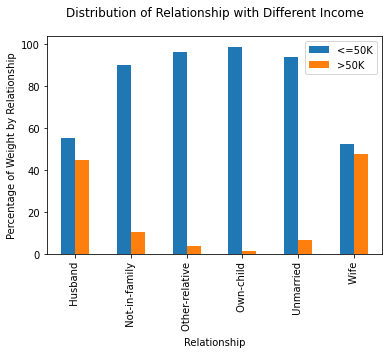

In [ ]:



bar_chart_n('Relationship')

In [ ]:
data.groupby('Sex')['Income'].count()

Sex
 Female    10762
 Male      21774
Name: Income, dtype: int64

- check the correlation within the group values in 'Marital_Status' and 'Relationship'

In [ ]:
data.groupby(['Marital_Status', 'Relationship'])["Income"].count()

Marital_Status          Relationship   
 Divorced                Not-in-family      2403
                         Other-relative      110
                         Own-child           328
                         Unmarried          1600
 Married-AF-spouse       Husband               9
                         Other-relative        1
                         Own-child             1
                         Wife                 12
 Married-civ-spouse      Husband           13178
                         Not-in-family        17
                         Other-relative      124
                         Own-child            95
                         Wife               1556
 Married-spouse-absent   Not-in-family       211
                         Other-relative       32
                         Own-child            45
                         Unmarried           130
 Never-married           Not-in-family      4693
                         Other-relative      611
                         Own-

- combine husband and wife into married, group the 'relationship' again.

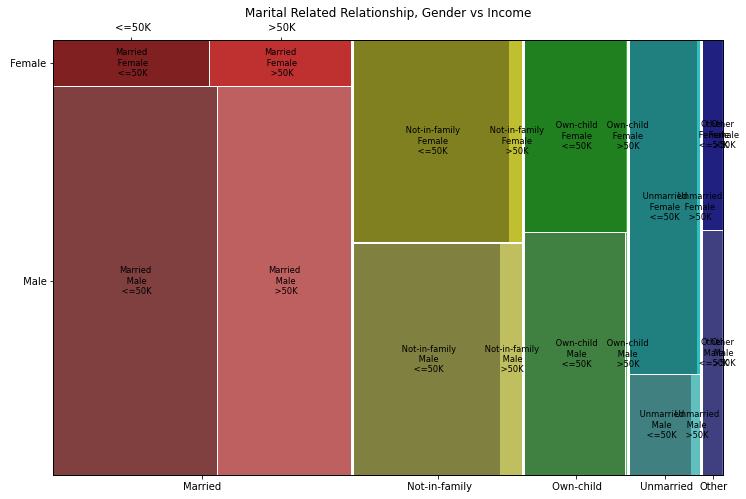

In [ ]:
data_re = data.copy()
data_re['Relationship'] = data_re['Relationship'].replace(' Wife', 'Married')
data_re['Relationship'] = data_re['Relationship'].replace(' Husband', 'Married')
data_re['Relationship'] = data_re['Relationship'].replace(' Other-relative', 'Other')
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 8))
fig.subplots_adjust(hspace=.5)
mosaic(data_re, ['Relationship','Sex','Income'], ax=ax)
plt.title("Marital Related Relationship, Gender vs Income")
plt.show()

- check the age distribution of sex

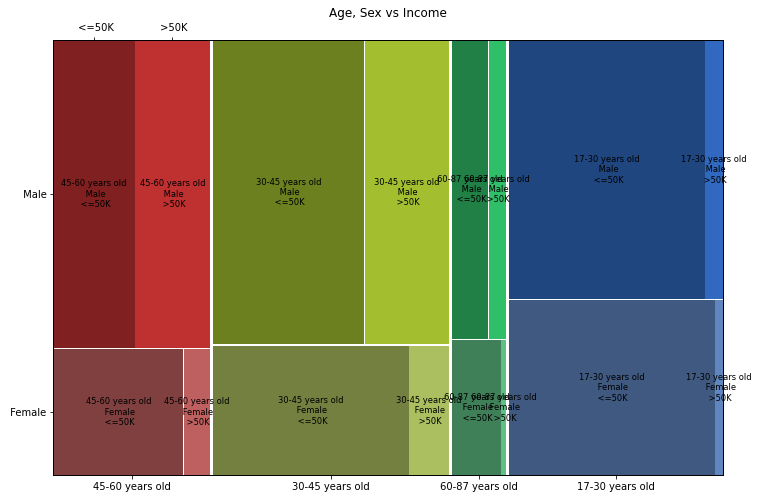

In [ ]:
mosaic_plot(['Age','Sex', 'Income'] )

# User story 5:  "Occupation", "Education_Num"


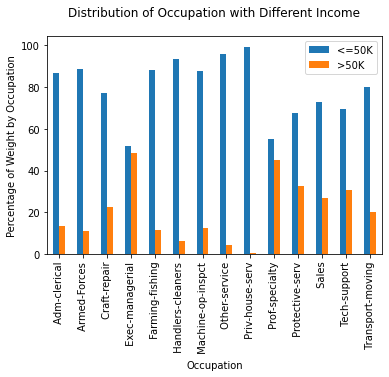

In [ ]:
bar_chart_n("Occupation")

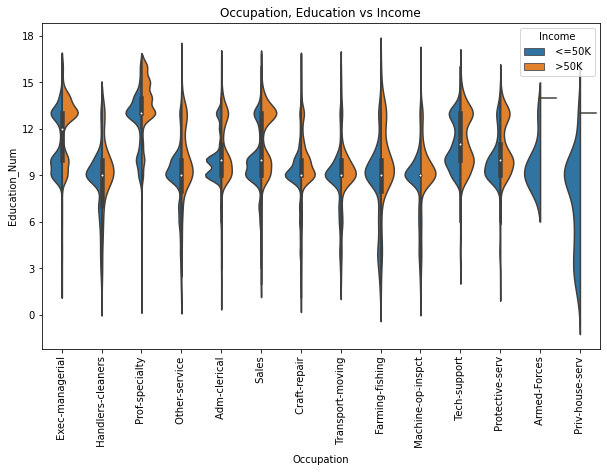

In [ ]:
fig,ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=data, x="Occupation", y="Education_Num", hue="Income", split=True)
plt.xticks(rotation=90)
plt.yticks(range(0,19,3))
plt.title("Occupation, Education vs Income")
plt.show()

In [ ]:
def
scatter_plot_biviriate
(
column1
,
column2
):
below = data.loc[data[
"Income"
] ==
" <=50K"
]
above = data.loc[data[
"Income"
] ==
" >50K"
]
title =
f
"Correlation between
{column1}
and
{column2}
with Different Income"
fig, ax = plt.subplots(nrows=
1
, ncols=
1
)
below.plot.scatter(x=column1, y=column2, label=
"<=50K"
, ax=ax)
above.plot.scatter(x=column1, y=column2, label=
">50K"
, c=
"orange"
, ax=ax)
ax.set_title(def
scatter_plot_biviriate
(
column1
,
column2
):
below = data.loc[data[
"Income"
] ==
" <=50K"
]
above = data.loc[data[
"Income"
] ==
" >50K"
]
title =
f
"Correlation between
{column1}
and
{column2}
with Different Income"
fig, ax = plt.subplots(nrows=
1
, ncols=
1
)
below.plot.scatter(x=column1, y=column2, label=
"<=50K"
, ax=ax)
above.plot.scatter(x=column1, y=column2, label=
">50K"
, c=
"orange"
, ax=ax)
ax.set_title(